# ISOLATION FOREST IMPLEMENTATION

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Load the dataset
data = pd.read_csv('Featured_dataset.csv') 

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Longitude         14249 non-null  float64
 1   Latitude          14249 non-null  float64
 2   Speed             14249 non-null  float64
 3   Distance          14249 non-null  float64
 4   Time              14249 non-null  object 
 5   Acc X             14249 non-null  float64
 6   Acc Y             14249 non-null  float64
 7   Acc Z             14249 non-null  float64
 8   Heading           14249 non-null  float64
 9   gyro_x            14249 non-null  float64
 10  gyro_y            14249 non-null  float64
 11  gyro_z            14249 non-null  float64
 12  label             14249 non-null  int64  
 13  Acc_Magnitude     14249 non-null  float64
 14  Acc_Change        14249 non-null  float64
 15  Gyro_Magnitude    14249 non-null  float64
 16  Gyro_Change       14249 non-null  float6

Accuracy: 0.4924
Precision: 0.9249
Recall: 0.1561
F1 Score: 0.2671


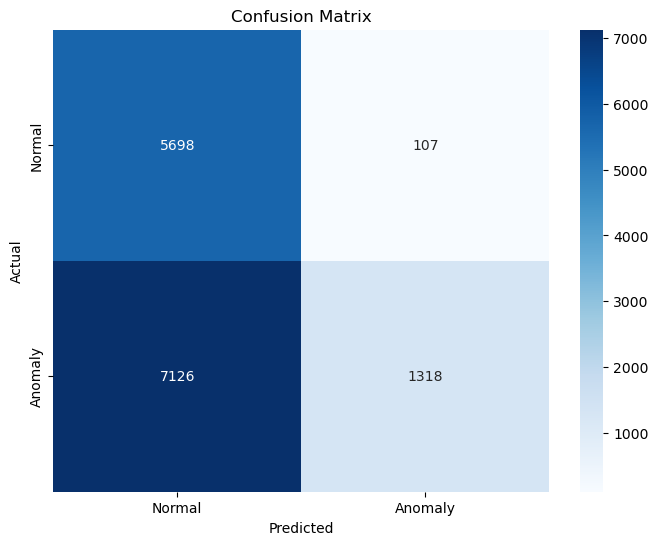

              precision    recall  f1-score   support

      Normal       0.44      0.98      0.61      5805
     Anomaly       0.92      0.16      0.27      8444

    accuracy                           0.49     14249
   macro avg       0.68      0.57      0.44     14249
weighted avg       0.73      0.49      0.41     14249



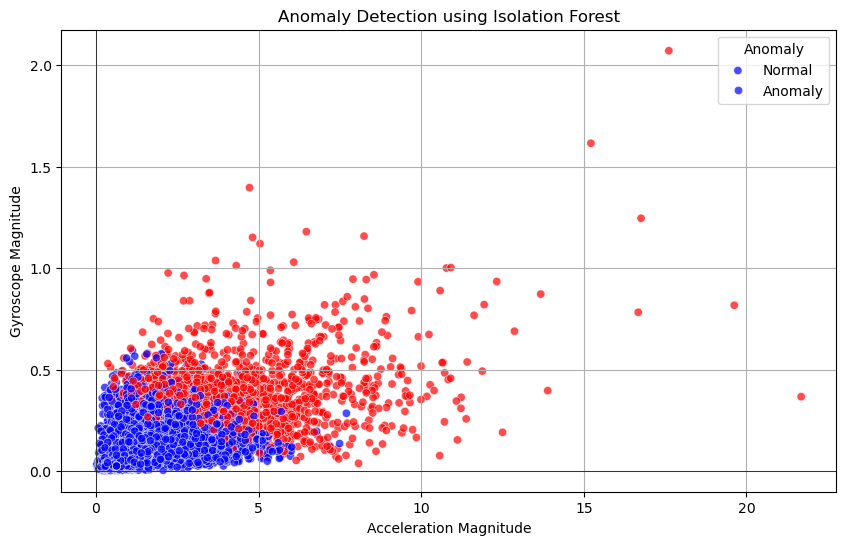

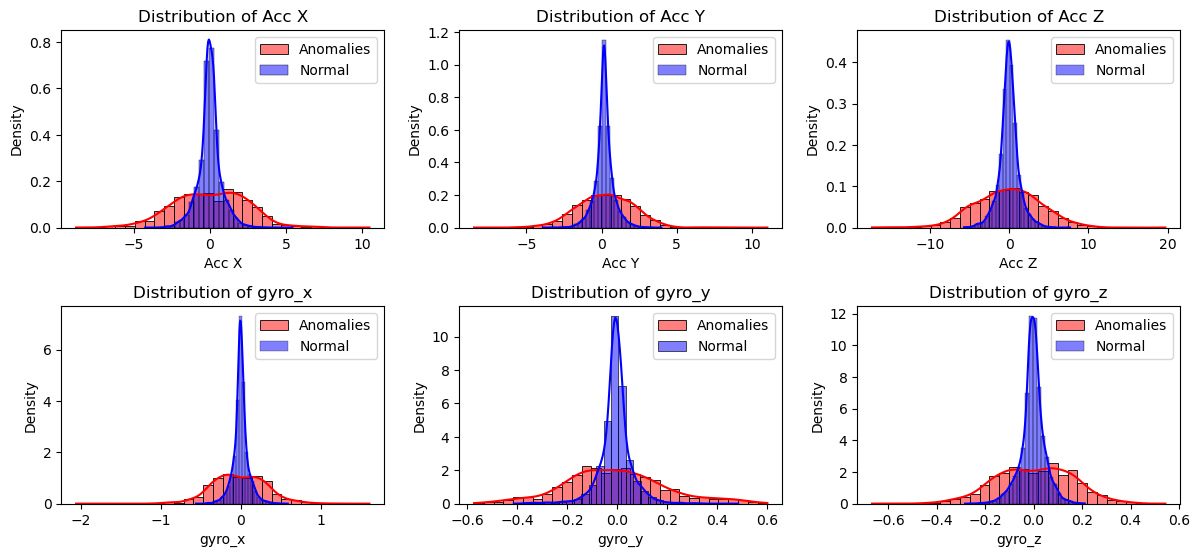

In [35]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report

# Select features for anomaly detection
features = ['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']  # Modify as needed
X = data[features]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1, random_state=42)  # Adjust contamination as needed

# Fit the model
iso_forest.fit(X_scaled)

# Predict anomalies
data['anomaly'] = iso_forest.predict(X_scaled)
data['anomaly'] = data['anomaly'].map({1: 0, -1: 1})  # Convert labels for easier interpretation

 # Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(data['label'], data['anomaly'])
precision = precision_score(data['label'], data['anomaly'])
recall = recall_score(data['label'], data['anomaly'])
f1 = f1_score(data['label'], data['anomaly'])
        
# Print and store the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Create confusion matrix
cm = confusion_matrix(data['label'], data['anomaly'])  # Replace 'label' with your actual label column name

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Anomaly'], 
            yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print(classification_report(data['label'], data['anomaly'], target_names=['Normal', 'Anomaly']))

# Visualizing anomalies on feature space
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Acc_Magnitude', y='Gyro_Magnitude', hue='anomaly', 
                palette={0: 'blue', 1: 'red'}, alpha=0.7)
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Acceleration Magnitude')
plt.ylabel('Gyroscope Magnitude')
plt.legend(title='Anomaly', loc='upper right', labels=['Normal', 'Anomaly'])
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid()
plt.show()

# Visualize the distribution of anomalies
plt.figure(figsize=(12, 8))
for feature in features:
    plt.subplot(3, 3, features.index(feature) + 1)  # Adjust the layout as needed
    sns.histplot(data[data['anomaly'] == 1][feature], color='red', bins=30, kde=True, label='Anomalies', stat='density', alpha=0.5)
    sns.histplot(data[data['anomaly'] == 0][feature], color='blue', bins=30, kde=True, label='Normal', stat='density', alpha=0.5)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
plt.tight_layout()
plt.show()


Evaluating for contamination = 0.05
Accuracy: 0.4511
Precision: 0.9369
Recall: 0.0791
F1 Score: 0.1459

Evaluating for contamination = 0.1
Accuracy: 0.4924
Precision: 0.9249
Recall: 0.1561
F1 Score: 0.2671

Evaluating for contamination = 0.2
Accuracy: 0.5704
Precision: 0.9074
Recall: 0.3063
F1 Score: 0.4579

Evaluating for contamination = 0.3
Accuracy: 0.6429
Precision: 0.8924
Recall: 0.4518
F1 Score: 0.5999

Evaluating for contamination = 0.4
Accuracy: 0.7111
Precision: 0.8796
Recall: 0.5938
F1 Score: 0.7090

Evaluating for contamination = 0.5
Accuracy: 0.7725
Precision: 0.8651
Recall: 0.7299
F1 Score: 0.7918

Best contamination: 0.5 with Accuracy: 0.7725
Precision: 0.8651, Recall: 0.7299, F1 Score: 0.7918


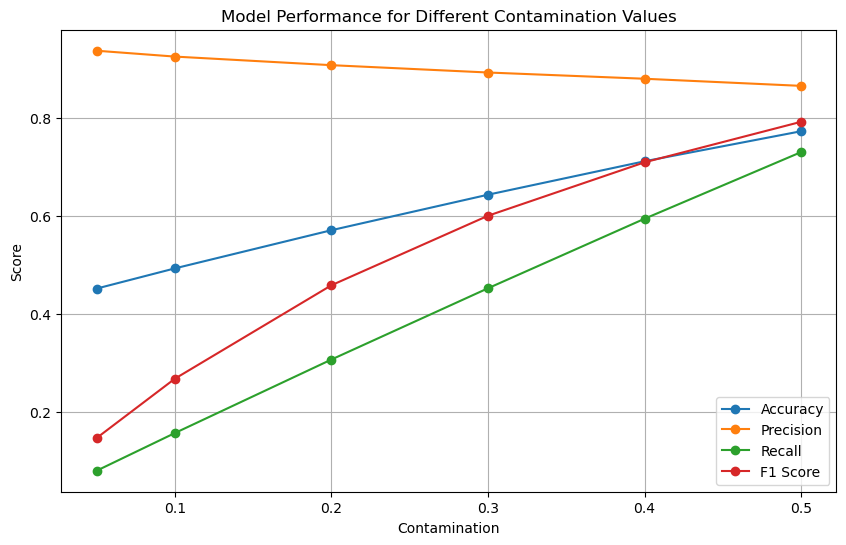

In [37]:
# Function to evaluate model performance for different contamination values
def evaluate_model_for_contamination(data, X_scaled, contamination_values):
    results = []
    
    for contamination in contamination_values:
        print(f"\nEvaluating for contamination = {contamination}")
        
        # Create the Isolation Forest model
        iso_forest = IsolationForest(contamination=contamination, random_state=42)
        
        # Fit the model
        iso_forest.fit(X_scaled)
        
        # Predict anomalies
        data['anomaly'] = iso_forest.predict(X_scaled)
        data['anomaly'] = data['anomaly'].map({1: 0, -1: 1})  # Convert labels for easier interpretation
        
        # Calculate accuracy, precision, recall, and F1 score
        accuracy = accuracy_score(data['label'], data['anomaly'])
        precision = precision_score(data['label'], data['anomaly'])
        recall = recall_score(data['label'], data['anomaly'])
        f1 = f1_score(data['label'], data['anomaly'])
        
        # Print and store the results
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        
        results.append({
            'contamination': contamination,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        })
    
    return results

# Define a list of contamination values to try
contamination_values = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]

# Call the function to evaluate the model for different contamination values
results = evaluate_model_for_contamination(data, X_scaled, contamination_values)

# Print the best contamination and its corresponding accuracy
best_contamination = max(results, key=lambda x: x['accuracy'])
print(f"\nBest contamination: {best_contamination['contamination']} with Accuracy: {best_contamination['accuracy']:.4f}")
print(f"Precision: {best_contamination['precision']:.4f}, Recall: {best_contamination['recall']:.4f}, F1 Score: {best_contamination['f1_score']:.4f}")

# Optionally, you can visualize the results
import matplotlib.pyplot as plt

# Plot the results
contaminations = [result['contamination'] for result in results]
accuracies = [result['accuracy'] for result in results]
precisions = [result['precision'] for result in results]
recalls = [result['recall'] for result in results]
f1_scores = [result['f1_score'] for result in results]

plt.figure(figsize=(10, 6))

# Plot accuracy, precision, recall, and f1 score
plt.plot(contaminations, accuracies, label='Accuracy', marker='o')
plt.plot(contaminations, precisions, label='Precision', marker='o')
plt.plot(contaminations, recalls, label='Recall', marker='o')
plt.plot(contaminations, f1_scores, label='F1 Score', marker='o')

plt.title('Model Performance for Different Contamination Values')
plt.xlabel('Contamination')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()
